# Python for Data Analysis
This is a hands on workshop aimed at getting you comfortable with the the syntax of core data analysis concepts in Python. Some background in base Python is useful, but not required to learn from this workshop.
* Keystrokes for the IPython notebook
* Reading and Summarizing Data
* Filtering and Sorting Data
* Modifying Columns
* Handling Missing Values
* EXERCISE: Working with drinks data
* Indexing and Slicing Data
* Analyzing across time
* Split-Apply-Combine
* Merging Data
* Writing Data
* Other Useful Features

### Keystrokes for the IPython Notebook
There are two modes: Command (enabled by `esc`) and Edit (enabled by `enter`). The table below has a quick reference of the main keystrokes that I will be using in the workshop. To get the full list go to **Help** -> **Keyboard Shortcuts**.


|          | Mac    | PC    |
|:----------|:--------|:-------|
| **Command Mode**  | esc    |       |
| Delete   | d, d     |       |
| Markdown   | m     |       |
| Run Cell   | control, return    |       |
| Run Cell and Insert Below   | option, return    |       |
| Insert Above   | a    |       |
| Insert Below   | b    |       |
| **Edit Mode**     | return | Enter |
| Run Cell | control, return     |       |
| Run Cell and Insert Below   | option, return    |       |

# Reading and Summarizing Data

#### Reading Data

In [1]:
# Import the pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
# Read a file with an absolute path
ufo = pd.read_csv('/Users/josiahdavis/Documents/GitHub/python_data_analysis/ufo_sightings.csv')

In [50]:
# Alterntively, read the the file using a relative path
ufo = pd.read_csv('ufo_sightings.csv')

In [51]:
# Alterntively read in the file from the internet
ufo = pd.read_csv('https://raw.githubusercontent.com/josiahdavis/python_data_analysis/master/ufo_sightings.csv')

In [52]:
# Get help on a function
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', dialect=None, compression=None, doublequote=True, escapechar=None, quotechar='"', quoting=0, skipinitialspace=False, lineterminator=None, header='infer', index_col=None, names=None, prefix=None, skiprows=None, skipfooter=None, skip_footer=0, na_values=None, na_fvalues=None, true_values=None, false_values=None, delimiter=None, converters=None, dtype=None, usecols=None, engine=None, delim_whitespace=False, as_recarray=False, na_filter=True, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, warn_bad_lines=True, error_bad_lines=True, keep_default_na=True, thousands=None, comment=None, decimal='.', parse_dates=False, keep_date_col=False, dayfirst=False, date_parser=None, memory_map=False, float_precision=None, nrows=None, iterator=False, chunksize=None, verbose=False, encoding=None, squeeze=False, mangle_dupe_cols=True, tupleize_cols=False, infer_datetime_format=False, ski

#### Summarize the data that was just read in

In [3]:
ufo.head(10)          # Look at the top 10 observations

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [55]:
ufo.tail()            # Bottom x observations (defaults to 5)

,City,Colors Reported,Shape Reported,State,Time
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30


In [56]:
ufo.describe()        # get summary statistics for columns

,City,Colors Reported,Shape Reported,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [57]:
ufo.index             # "the index" (aka "the labels")

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], dtype='int64')

In [58]:
ufo.columns           # column names (which is "an index")

Index([u'City', u'Colors Reported', u'Shape Reported', u'State', u'Time'], dtype='object')

In [59]:
ufo.dtypes            # data types of each column

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [60]:
ufo.values            # underlying numpy array

array([['Ithaca', nan, 'TRIANGLE', 'NY', '6/1/1930 22:00'],
       ['Willingboro', nan, 'OTHER', 'NJ', '6/30/1930 20:00'],
       ['Holyoke', nan, 'OVAL', 'CO', '2/15/1931 14:00'],
       ..., 
       ['Tucson', 'RED BLUE', nan, 'AZ', '9/5/2014 2:40'],
       ['Orland park', 'RED', 'LIGHT', 'IL', '9/5/2014 3:43'],
       ['Loughman', nan, 'LIGHT', 'FL', '9/5/2014 5:30']], dtype=object)

In [61]:
ufo.info()            # concise summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80543 entries, 0 to 80542
Data columns (total 5 columns):
City               80496 non-null object
Colors Reported    17034 non-null object
Shape Reported     72141 non-null object
State              80543 non-null object
Time               80543 non-null object
dtypes: object(5)
memory usage: 3.7+ MB


# Filtering and Sorting Data

In [62]:
# Select a single column
ufo['State']

0     NY
1     NJ
2     CO
3     KS
4     NY
5     ND
6     CA
7     MI
8     AK
9     OR
10    CA
11    AL
12    SC
13    IA
14    MI
...
80528    OH
80529    WA
80530    FL
80531    VA
80532    MA
80533    IA
80534    TX
80535    KY
80536    PA
80537    NE
80538    NE
80539    OH
80540    AZ
80541    IL
80542    FL
Name: State, Length: 80543, dtype: object

In [63]:
ufo.State                       # This is equivalent

0     NY
1     NJ
2     CO
3     KS
4     NY
5     ND
6     CA
7     MI
8     AK
9     OR
10    CA
11    AL
12    SC
13    IA
14    MI
...
80528    OH
80529    WA
80530    FL
80531    VA
80532    MA
80533    IA
80534    TX
80535    KY
80536    PA
80537    NE
80538    NE
80539    OH
80540    AZ
80541    IL
80542    FL
Name: State, Length: 80543, dtype: object

In [64]:
# Select multiple columns
ufo[['State', 'City','Shape Reported']]

,State,City,Shape Reported
0,NY,Ithaca,TRIANGLE
1,NJ,Willingboro,OTHER
2,CO,Holyoke,OVAL
3,KS,Abilene,DISK
4,NY,New York Worlds Fair,LIGHT
5,ND,Valley City,DISK
6,CA,Crater Lake,CIRCLE
7,MI,Alma,DISK
8,AK,Eklutna,CIGAR
9,OR,Hubbard,CYLINDER


In [65]:
my_cols = ['State', 'City', 'Shape Reported']
ufo[my_cols]                    # This is equivalent

,State,City,Shape Reported
0,NY,Ithaca,TRIANGLE
1,NJ,Willingboro,OTHER
2,CO,Holyoke,OVAL
3,KS,Abilene,DISK
4,NY,New York Worlds Fair,LIGHT
5,ND,Valley City,DISK
6,CA,Crater Lake,CIRCLE
7,MI,Alma,DISK
8,AK,Eklutna,CIGAR
9,OR,Hubbard,CYLINDER


In [74]:
# Logical filtering
ufo[ufo.State == 'TX']          # Select only rows where State == 'TX'

,City,Colors Reported,Shape Reported,State,Time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00
114,Post,NaN,DISK,TX,9/15/1949 21:00
115,San Marcos,NaN,CYLINDER,TX,10/10/1949 20:30
116,Lackland AFB,NaN,LIGHT,TX,10/10/1949 21:00
132,Fort Worth,NaN,DISK,TX,6/15/1950 20:00
134,Galveston,NaN,SPHERE,TX,6/20/1950 17:00
174,Greenville,ORANGE,TRIANGLE,TX,4/15/1952 16:00


In [76]:
ufo[~(ufo.State == 'TX')]       # Select everything where the test fails

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [68]:
ufo[ufo.State != 'TX']          # Same thing as before

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [69]:
ufo.City[ufo.State == 'TX']     # Select only city columm where State == 'TX'

37                Dallas
43                 Alice
49                Conroe
92                Borger
114                 Post
115           San Marcos
116         Lackland AFB
132           Fort Worth
134            Galveston
174           Greenville
189                Pecos
201            Arlington
213    Smithson's Valley
223             Oklahoma
235           Fort Worth
...
79965           Austin
79969           Austin
79986          Houston
80038           Borger
80075       Round Rock
80113           Menard
80134           Morton
80141      Port Neches
80240    New Braunfels
80241       Atascocita
80287       Lago Vista
80350          Houston
80414          Eustace
80476       Fort Worth
80534         Burleson
Name: City, Length: 4186, dtype: object

In [70]:
ufo[ufo.State == 'TX'].City     # Same thing as before

37                Dallas
43                 Alice
49                Conroe
92                Borger
114                 Post
115           San Marcos
116         Lackland AFB
132           Fort Worth
134            Galveston
174           Greenville
189                Pecos
201            Arlington
213    Smithson's Valley
223             Oklahoma
235           Fort Worth
...
79965           Austin
79969           Austin
79986          Houston
80038           Borger
80075       Round Rock
80113           Menard
80134           Morton
80141      Port Neches
80240    New Braunfels
80241       Atascocita
80287       Lago Vista
80350          Houston
80414          Eustace
80476       Fort Worth
80534         Burleson
Name: City, Length: 4186, dtype: object

In [71]:
ufo[(ufo.State == 'CA') | (ufo.State =='TX')] # Select only records where State is 'CA' or State is 'TX'

,City,Colors Reported,Shape Reported,State,Time
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
10,Fontana,NaN,LIGHT,CA,8/15/1937 21:00
15,Forest Home,NaN,CIRCLE,CA,7/2/1941 11:30
16,Los Angeles,NaN,NaN,CA,2/25/1942 0:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
33,Salinas AFB,NaN,DISK,CA,6/1/1945 12:00
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
38,Huntington Beach,NaN,DISK,CA,8/8/1945 12:00
42,Merced,NaN,SPHERE,CA,2/1/1946 17:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30


In [72]:
ufo_dallas = ufo[(ufo.City == 'Dallas') & (ufo.State =='TX')]  # Select only Dallas, TX records

In [77]:
ufo[ufo.City.isin(['Austin','Dallas', 'Houston'])] # Select only Austin, Dallas, or Houston records

,City,Colors Reported,Shape Reported,State,Time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
267,Houston,NaN,DISK,TX,6/1/1954 0:00
373,Houston,NaN,TRIANGLE,TX,6/30/1956 18:30
392,Dallas,NaN,NaN,TX,1/1/1957 21:00
414,Dallas,NaN,OTHER,TX,6/30/1957 0:00
428,Houston,NaN,DIAMOND,TX,7/15/1957 13:00
463,Houston,NaN,LIGHT,TX,10/15/1957 20:30
490,Houston,NaN,DISK,TX,6/15/1958 20:00
584,Houston,NaN,TRIANGLE,TX,3/12/1960 23:00
585,Houston,NaN,OTHER,TX,4/1/1960 21:00


#### Sorting

In [78]:
ufo.State.order()                               # only works for a Series

76702    AK
74536    AK
28987    AK
8551     AK
76703    AK
31387    AK
2374     AK
44188    AK
18424    AK
61798    AK
1891     AK
33161    AK
73924    AK
48085    AK
67403    AK
...
14586    WY
1177     WY
77831    WY
80082    WY
188      WY
26882    WY
41926    WY
54342    WY
79897    WY
55682    WY
52869    WY
49543    WY
7183     WY
58080    WY
21766    WY
Name: State, Length: 80543, dtype: object

In [79]:
ufo.sort_index(inplace=True)                    # sort rows by label

In [80]:
ufo.sort_index(ascending=False, inplace=False)

,City,Colors Reported,Shape Reported,State,Time
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80537,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80536,Wyoming,RED,DISK,PA,9/4/2014 23:00
80535,Elizabethtown,NaN,CIRCLE,KY,9/4/2014 22:30
80534,Burleson,NaN,LIGHT,TX,9/4/2014 22:30
80533,Melbourne,NaN,OVAL,IA,9/4/2014 22:15


In [81]:
ufo.sort_index(by='State')                      # sort rows by specific column

,City,Colors Reported,Shape Reported,State,Time
76702,Wasilla,NaN,VARIOUS,AK,3/28/2014 11:17
74536,Ketchikan,NaN,LIGHT,AK,12/5/2013 17:04
28987,Anchorage,NaN,SPHERE,AK,5/28/2004 8:35
8551,Cantwell,NaN,CIRCLE,AK,8/20/1995 11:30
76703,Chugiak,NaN,LIGHT,AK,3/28/2014 11:30
31387,Fairbanks,NaN,NaN,AK,12/20/2004 20:00
2374,Chugiak,NaN,RECTANGLE,AK,5/15/1973 22:00
44188,Alaska,NaN,CIGAR,AK,4/29/2008 0:00
18424,North Pole,NaN,DISK,AK,1/24/2001 0:00
61798,Anchorage,RED,LIGHT,AK,3/2/2012 19:30


In [82]:
ufo.sort_index(by=['State', 'Shape Reported'])  # sort by multiple columns

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
413,Arctic,NaN,CIGAR,AK,6/30/1957 0:00
1306,Delta Junction,ORANGE,CIGAR,AK,9/15/1966 18:00
1891,Fairbanks,NaN,CIGAR,AK,9/20/1969 23:00
7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
10682,Kenai,NaN,CIGAR,AK,8/8/1997 23:00
44188,Alaska,NaN,CIGAR,AK,4/29/2008 0:00
76721,Anchorage,NaN,CIGAR,AK,3/29/2014 20:45
1494,Gula,NaN,CIRCLE,AK,8/15/1967 23:00
2304,Anchorage,BLUE,CIRCLE,AK,8/30/1972 1:30


In [83]:
ufo.sort_index(by=['State', 'Shape Reported'], ascending=[False, True], inplace=True)  # specify sort order

# Modifying Columns

In [84]:
# Add a new column as a function of existing columns
ufo['Location'] = ufo['City'] + ', ' + ufo['State']
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
7064,Mammoth Hot Springs,YELLOW,CHEVRON,WY,6/4/1993 21:55,"Mammoth Hot Springs, WY"
24658,Jackson Hole,NaN,CHEVRON,WY,3/16/2003 11:00,"Jackson Hole, WY"
61928,Rock Springs,NaN,CHEVRON,WY,3/12/2012 1:02,"Rock Springs, WY"
73885,Casper,NaN,CHEVRON,WY,11/7/2013 1:45,"Casper, WY"
74651,Powell,NaN,CHEVRON,WY,12/11/2013 18:25,"Powell, WY"


In [86]:
# Rename columns
ufo.rename(columns={'Colors Reported':'Colors', 'Shape Reported':'Shape'}, inplace=True)
ufo.head()

,City,Colors,Shape,State,Time,Location
7064,Mammoth Hot Springs,YELLOW,CHEVRON,WY,6/4/1993 21:55,"Mammoth Hot Springs, WY"
24658,Jackson Hole,NaN,CHEVRON,WY,3/16/2003 11:00,"Jackson Hole, WY"
61928,Rock Springs,NaN,CHEVRON,WY,3/12/2012 1:02,"Rock Springs, WY"
73885,Casper,NaN,CHEVRON,WY,11/7/2013 1:45,"Casper, WY"
74651,Powell,NaN,CHEVRON,WY,12/11/2013 18:25,"Powell, WY"


In [87]:
# Hide a column (temporarily)
ufo.drop(['Location'], axis=1)

,City,Colors,Shape,State,Time
7064,Mammoth Hot Springs,YELLOW,CHEVRON,WY,6/4/1993 21:55
24658,Jackson Hole,NaN,CHEVRON,WY,3/16/2003 11:00
61928,Rock Springs,NaN,CHEVRON,WY,3/12/2012 1:02
73885,Casper,NaN,CHEVRON,WY,11/7/2013 1:45
74651,Powell,NaN,CHEVRON,WY,12/11/2013 18:25
1461,Wyoming,NaN,CIGAR,WY,7/12/1967 2:00
12072,Cheyenne,NaN,CIGAR,WY,9/4/1998 15:00
60064,Torrington,NaN,CIGAR,WY,11/5/2011 21:30
72264,Wyoming,NaN,CIGAR,WY,9/1/2013 0:00
1985,Cheyenne,NaN,CIRCLE,WY,6/20/1970 2:00


In [88]:
# Delete a column (permanently)
del ufo['Location']

# Handling Missing Values

In [89]:
# Missing values are often just excluded
ufo.describe()                          # Excludes missing values

,City,Colors,Shape,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [90]:
ufo.Shape.value_counts()                # Excludes missing values

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
FLARE            1
PYRAMID          1
DOME             1
dtype: int64

In [91]:
ufo.Shape.value_counts(dropna=False)    # Includes missing values

LIGHT        16332
NaN           8402
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
PYRAMID          1
DOME             1
FLARE            1
dtype: int64

In [92]:
# Find missing values in a Series
ufo.Shape.isnull()       # True if NaN, False otherwise

7064     False
24658    False
61928    False
73885    False
74651    False
1461     False
12072    False
60064    False
72264    False
1985     False
3326     False
9399     False
23452    False
29083    False
49543    False
...
48773    True
52781    True
53051    True
56186    True
56499    True
61311    True
65642    True
68292    True
71252    True
73090    True
73916    True
74639    True
74969    True
75471    True
77458    True
Name: Shape, Length: 80543, dtype: bool

In [93]:
ufo.Shape.notnull()      # False if NaN, True otherwise

7064     True
24658    True
61928    True
73885    True
74651    True
1461     True
12072    True
60064    True
72264    True
1985     True
3326     True
9399     True
23452    True
29083    True
49543    True
...
48773    False
52781    False
53051    False
56186    False
56499    False
61311    False
65642    False
68292    False
71252    False
73090    False
73916    False
74639    False
74969    False
75471    False
77458    False
Name: Shape, Length: 80543, dtype: bool

In [94]:
ufo.Shape.isnull().sum() # Count the missing values

8402

In [95]:
# Find missing values in a DataFrame
ufo.isnull()

,City,Colors,Shape,State,Time
7064,False,False,False,False,False
24658,False,True,False,False,False
61928,False,True,False,False,False
73885,False,True,False,False,False
74651,False,True,False,False,False
1461,False,True,False,False,False
12072,False,True,False,False,False
60064,False,True,False,False,False
72264,False,True,False,False,False
1985,False,True,False,False,False


In [96]:
# Count the missing values in a DataFrame
ufo.isnull().sum()

City         47
Colors    63509
Shape      8402
State         0
Time          0
dtype: int64

In [97]:
# Exclude rows with missing values in a dataframe
ufo[(ufo.Shape.notnull()) & (ufo.Colors.notnull())]

,City,Colors,Shape,State,Time
7064,Mammoth Hot Springs,YELLOW,CHEVRON,WY,6/4/1993 21:55
23452,Lander,GREEN,CIRCLE,WY,10/6/2002 19:25
59084,Casper,RED GREEN BLUE,CIRCLE,WY,9/12/2011 20:30
68629,Point of Rocks,GREEN,CIRCLE,WY,2/14/2013 6:00
77097,Yellowstone North Entrance,RED YELLOW,CIRCLE,WY,4/17/2014 18:00
23356,Fort Bridger,GREEN,DISK,WY,9/28/2002 18:30
67644,Rock Springs,RED,DISK,WY,12/7/2012 6:30
12241,Rock Springs,GREEN,FIREBALL,WY,9/26/1998 3:05
23132,Gillette,GREEN,FIREBALL,WY,9/6/2002 20:30
10729,Atlantic City,RED,LIGHT,WY,8/22/1997 23:30


In [98]:
# Drop missing values
ufo.dropna()             # Drop a row if ANY values are missing

,City,Colors,Shape,State,Time
7064,Mammoth Hot Springs,YELLOW,CHEVRON,WY,6/4/1993 21:55
23452,Lander,GREEN,CIRCLE,WY,10/6/2002 19:25
59084,Casper,RED GREEN BLUE,CIRCLE,WY,9/12/2011 20:30
68629,Point of Rocks,GREEN,CIRCLE,WY,2/14/2013 6:00
77097,Yellowstone North Entrance,RED YELLOW,CIRCLE,WY,4/17/2014 18:00
23356,Fort Bridger,GREEN,DISK,WY,9/28/2002 18:30
67644,Rock Springs,RED,DISK,WY,12/7/2012 6:30
12241,Rock Springs,GREEN,FIREBALL,WY,9/26/1998 3:05
23132,Gillette,GREEN,FIREBALL,WY,9/6/2002 20:30
10729,Atlantic City,RED,LIGHT,WY,8/22/1997 23:30


In [99]:
ufo.dropna(how='all')    # Drop a row only if ALL values are missing

,City,Colors,Shape,State,Time
7064,Mammoth Hot Springs,YELLOW,CHEVRON,WY,6/4/1993 21:55
24658,Jackson Hole,NaN,CHEVRON,WY,3/16/2003 11:00
61928,Rock Springs,NaN,CHEVRON,WY,3/12/2012 1:02
73885,Casper,NaN,CHEVRON,WY,11/7/2013 1:45
74651,Powell,NaN,CHEVRON,WY,12/11/2013 18:25
1461,Wyoming,NaN,CIGAR,WY,7/12/1967 2:00
12072,Cheyenne,NaN,CIGAR,WY,9/4/1998 15:00
60064,Torrington,NaN,CIGAR,WY,11/5/2011 21:30
72264,Wyoming,NaN,CIGAR,WY,9/1/2013 0:00
1985,Cheyenne,NaN,CIRCLE,WY,6/20/1970 2:00


In [100]:
# Fill in missing values for a series
ufo.Colors.fillna(value='Unknown', inplace=True)

In [101]:
# Fill in missing values for the DataFrame
ufo.fillna(value='Unknown', inplace=True)

# Exercise: Working with the Drinks Data
*(Be on the lookout for a curveball question)*

In [31]:
# Read drinks.csv (in the 'drinks_data' folder) into a DataFrame called 'drinks'

In [32]:
# Print the first 10 rows

In [33]:
# Examine the data types of all columns

In [34]:
# Print the 'beer_servings' Series

In [35]:
# Calculate the average 'beer_servings' for the entire dataset

In [36]:
# Print all columns, but only show rows where the country is in Europe

In [37]:
# Calculate the average 'beer_servings' for all of Europe

In [38]:
# Only show European countries with 'wine_servings' greater than 300

In [39]:
# Determine which 10 countries have the highest 'total_litres_of_pure_alcohol'

In [40]:
# Determine which country has the highest value for 'beer_servings'

In [41]:
# Count the number of occurrences of each 'continent' value and see if it looks correct

In [42]:
# Determine which countries do not have continent designations

In [43]:
# Determine the number of countries per continent. Does it look right?

# Solutions

In [102]:
# Read drinks.csv (in the drinks_data folder) into a DataFrame called 'drinks'
drinks = pd.read_csv('drinks_data/drinks.csv')

In [103]:
# Print the first 10 rows
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [104]:
# Examine the data types of all columns
drinks.dtypes
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 10.6+ KB


In [ ]:
# Print the 'beer_servings' Series
drinks.beer_servings
drinks['beer_servings']

In [107]:
# Calculate the average 'beer_servings' for the entire dataset
drinks.describe()                   # Mean is provided in the summary from describe()
drinks.beer_servings.mean()         # Alternatively, calculate the mean directly

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [108]:
# Print all columns, but only show rows where the country is in Europe
drinks[drinks.continent=='EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [109]:
# Calculate the average 'beer_servings' for all of Europe (hint: use the .mean() function)
drinks[drinks.continent=='EU'].beer_servings.mean()

193.77777777777777

In [110]:
# Only show European countries with 'wine_servings' greater than 300
drinks[(drinks.continent=='EU') & (drinks.wine_servings > 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [111]:
# Determine which 10 countries have the highest 'total_litres_of_pure_alcohol'
drinks.sort_index(by='total_litres_of_pure_alcohol').tail(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
99,Luxembourg,236,133,271,11.4,EU
155,Slovakia,196,293,116,11.4,EU
81,Ireland,313,118,165,11.4,EU
141,Russian Federation,247,326,73,11.5,AS
61,France,127,151,370,11.8,EU
45,Czech Republic,361,170,134,11.8,EU
68,Grenada,199,438,28,11.9,NaN
3,Andorra,245,138,312,12.4,EU
98,Lithuania,343,244,56,12.9,EU
15,Belarus,142,373,42,14.4,EU


In [112]:
# Determine which country has the highest value for 'beer_servings' (hint: use the .max() function)
drinks[drinks.beer_servings==drinks.beer_servings.max()].country

117    Namibia
Name: country, dtype: object

In [113]:
drinks[['country', 'beer_servings']].sort_index(by='beer_servings', ascending=False).head(1) # This is equivalent

,country,beer_servings
117,Namibia,376


In [114]:
# Count the number of occurrences of each 'continent' value and see if it looks correct
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
dtype: int64

In [115]:
# Determine which countries do not have continent designations
drinks[drinks.continent.isnull()].country

5                 Antigua & Barbuda
11                          Bahamas
14                         Barbados
17                           Belize
32                           Canada
41                       Costa Rica
43                             Cuba
50                         Dominica
51               Dominican Republic
54                      El Salvador
68                          Grenada
69                        Guatemala
73                            Haiti
74                         Honduras
84                          Jamaica
109                          Mexico
122                       Nicaragua
130                          Panama
143               St. Kitts & Nevis
144                       St. Lucia
145    St. Vincent & the Grenadines
174               Trinidad & Tobago
184                             USA
Name: country, dtype: object

In [116]:
# Due to "na_filter = True" default within pd.read_csv()
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', dialect=None, compression=None, doublequote=True, escapechar=None, quotechar='"', quoting=0, skipinitialspace=False, lineterminator=None, header='infer', index_col=None, names=None, prefix=None, skiprows=None, skipfooter=None, skip_footer=0, na_values=None, na_fvalues=None, true_values=None, false_values=None, delimiter=None, converters=None, dtype=None, usecols=None, engine=None, delim_whitespace=False, as_recarray=False, na_filter=True, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, warn_bad_lines=True, error_bad_lines=True, keep_default_na=True, thousands=None, comment=None, decimal='.', parse_dates=False, keep_date_col=False, dayfirst=False, date_parser=None, memory_map=False, float_precision=None, nrows=None, iterator=False, chunksize=None, verbose=False, encoding=None, squeeze=False, mangle_dupe_cols=True, tupleize_cols=False, infer_datetime_format=False, ski

# Indexing and Slicing Data

#### Create a new index

In [117]:
ufo.set_index('State', inplace=True)
ufo.index

Index([u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', u'WY', ...], dtype='object')

In [118]:
ufo.index.is_unique

False

In [119]:
ufo.sort_index(inplace=True)
ufo.head(25)

,City,Colors,Shape,Time
State,,,,
AK,Wainwright,Unknown,LIGHT,1/2/2002 21:32
AK,Mountain Village,Unknown,Unknown,3/2/1996 0:30
AK,Anchorage,Unknown,Unknown,5/5/2014 16:00
AK,Talkitna,Unknown,Unknown,1/14/2014 23:00
AK,Anchorage,Unknown,Unknown,12/26/2013 18:21
AK,Fairbanks,ORANGE,Unknown,12/10/2013 23:15
AK,Fairbanks,ORANGE BLUE,Unknown,11/8/2013 23:00
AK,Anchorage,Unknown,Unknown,10/5/2013 2:55
AK,Sterling,Unknown,Unknown,7/22/2013 3:13


#### loc: filter rows by LABEL, and select columns by LABEL

In [120]:
ufo.loc['FL',:]                                     # row with label FL`

,City,Colors,Shape,Time
State,,,,
FL,Plantation,Unknown,TEARDROP,11/5/2000 5:12
FL,Wildwood,RED GREEN,Unknown,9/2/2014 5:00
FL,Kissimmee,Unknown,Unknown,8/22/2014 21:10
FL,Cape Canaveral,RED GREEN,Unknown,8/6/2014 22:00
FL,Port Saint Lucie,Unknown,Unknown,8/5/2014 4:00
FL,South Daytona,RED,Unknown,7/30/2014 23:15
FL,Sarasota,Unknown,Unknown,7/26/2014 21:00
FL,Jacksonville,Unknown,Unknown,7/22/2014 0:05
FL,Ruskin,Unknown,Unknown,7/14/2014 21:15


In [ ]:
ufo.loc[:'FL',:]                                    # rows with labels  through'FL'

In [ ]:
ufo.loc['FL':'HI', 'City':'Shape']         # rows FL, columns 'City' through 'Shape Reported'

In [ ]:
ufo.loc[:, 'City':'Shape']                 # all rows, columns 'City' through 'Shape Reported'

In [ ]:
ufo.loc[['FL', 'TX'], ['City','Shape']]    # rows FL and TX, columns 'City' and 'Shape Reported'

#### iloc: filter rows by POSITION, and select columns by POSITION

In [ ]:
ufo.iloc[0,:]                       # row with 0th position (first row)

In [ ]:
ufo.iloc[0:3,:]                     # rows with positions 0 through 2 (not 3)

In [ ]:
ufo.iloc[0:3, 0:3]                  # rows and columns with positions 0 through 2

In [ ]:
ufo.iloc[:, 0:3]                    # all rows, columns with positions 0 through 2

In [ ]:
ufo.iloc[[0,2], [0,1]]              # 1st and 3rd row, 1st and 2nd column

#### Add another level to the index

In [121]:
ufo.set_index('City', inplace=True, append=True) # Adds to existing index
ufo.sort_index(inplace=True)
ufo.head(25)

Colors    Shape              Time
State City                                             
AK    Adak           Unknown    LIGHT     6/1/1986 0:00
      Alaska         Unknown    CIGAR    4/29/2008 0:00
      Alaska         Unknown     DISK   1/15/1998 13:00
      Alaska         Unknown    LIGHT    9/1/1999 23:00
      Alaska cruise  Unknown    LIGHT   5/11/2011 21:00
      Anchor Point   Unknown     DISK   5/24/2005 18:30
      Anchorage      Unknown  Unknown    5/5/2014 16:00
      Anchorage      Unknown  Unknown  12/26/2013 18:21
      Anchorage      Unknown  Unknown    10/5/2013 2:55
      Anchorage      Unknown  Unknown     1/7/2013 1:50
      Anchorage       ORANGE  Unknown   1/22/2012 20:15
      Anchorage          RED  Unknown   1/20/2002 20:00
      Anchorage      Unknown    CIGAR   3/29/2014 20:45
      Anchorage         BLUE   CIRCLE    8/30/1972 1:30
      Anchorage      Unknown   CIRCLE  10/31/1998 10:00
      Anchorage      Unknown   CIRCLE    1/24/2003 8:30
      Anchorage      Unknown   CIRCLE   8/16/2004 12:08
      Anchorage      Unknown   CIRCLE  10/23/2006 21:00
      Anchorage      Unknown   CIRCLE    8/6/2010 18:00
      Anchorage      Unknown   CIRCLE  12/16/2010 12:00
      Anchorage      Unknown   CIRCLE  10/21/2011 21:00
      Anchorage      Unknown   CIRCLE  11/23/2011 11:00
      Anchorage       ORANGE   CIRCLE  10/23/2013 20:00
      Anchorage          RED   CIRCLE  12/19/2013 16:00
      Anchorage          RED   CIRCLE  12/23/2013 22:22

In [122]:
ufo.loc[['ND', 'WY'],:] # Select all records from ND AND WY

Colors      Shape              Time
State City                                                               
ND    Amenia                         Unknown       DISK   7/15/1978 18:00
      Aneta                          Unknown     CIRCLE  12/20/2001 19:30
      Arthur                         Unknown    Unknown    9/7/1958 19:00
      Beach                          Unknown       DISK    7/3/1996 11:30
      Belcourt                       Unknown      OTHER    6/18/2012 7:00
      Belcourt                       Unknown     CIRCLE    4/14/2012 6:00
      Belfield                       Unknown      LIGHT   7/17/1997 23:00
      Belfield                       Unknown       DISK   9/15/2000 19:00
      Berthold                       Unknown      CIGAR   7/15/1976 15:00
      Bismarck                        ORANGE    Unknown  11/24/1996 19:30
      Bismarck                       Unknown    VARIOUS   9/10/2008 22:30
      Bismarck                        ORANGE   TRIANGLE   4/25/2012 23:30
      Bismarck                       Unknown   TRIANGLE   9/29/2011 22:30
      Bismarck                           RED  RECTANGLE   6/30/2008 23:00
      Bismarck                       Unknown      OTHER  11/28/2003 23:45
      Bismarck                       Unknown      LIGHT    8/5/2013 23:15
      Bismarck                       Unknown      LIGHT    6/4/2010 22:00
      Bismarck                       Unknown      LIGHT     7/1/2000 2:30
      Bismarck                       Unknown      LIGHT  11/24/1996 18:07
      Bismarck                       Unknown  FORMATION  10/11/1996 16:00
      Bismarck                       Unknown       DISK   4/11/2009 11:20
      Bismarck                    GREEN BLUE     CIRCLE    8/14/2004 4:15
      Brunswick County               Unknown    Unknown  10/25/1995 16:55
      Burlington                     Unknown   FIREBALL   8/14/1998 16:00
      Cartwright                     Unknown  RECTANGLE   5/20/1999 14:00
      Casselton                      Unknown   TRIANGLE   4/11/2012 21:58
      Casselton                      Unknown   TRIANGLE   4/11/2012 21:48
      Casselton                     RED BLUE    Unknown    8/24/2008 1:00
      Central U.S.                   Unknown    DIAMOND    4/2/1995 13:00
      Colfax                         Unknown       DISK   1/15/2008 21:00
...                                      ...        ...               ...
WY    Sheridan                       Unknown       OVAL    9/6/2002 21:00
      Sheridan                       Unknown      OTHER    9/24/1998 0:15
      Sheridan                       Unknown      LIGHT    8/7/2012 22:20
      Sheridan                     RED GREEN      LIGHT  12/19/2006 21:00
      Sheridan                       Unknown      LIGHT   10/28/2004 2:00
      Shirley Basin Road             Unknown      LIGHT   3/15/2006 23:30
      Ten Sleep                      Unknown       DISK   3/21/1998 20:00
      Teton National Park            Unknown       OVAL   7/19/2008 12:00
      Teton National Park            Unknown      OTHER   9/26/2005 11:00
      Thermopolis                    Unknown    Unknown   6/14/2007 23:00
      Torrington                     Unknown      CIGAR   11/5/2011 21:30
      Wheeling                       Unknown    Unknown   6/15/1984 20:30
      Worland                        Unknown       OVAL    2/15/2008 5:00
      Worland                        Unknown      LIGHT   6/17/2003 22:42
      Wyoming                        Unknown      OTHER   9/28/2005 16:30
      Wyoming                        Unknown      OTHER    4/20/1983 0:00
      Wyoming                        Unknown      CIGAR     9/1/2013 0:00
      Wyoming                        Unknown      CIGAR    7/12/1967 2:00
      Yellowstone                    Unknown      LIGHT    8/4/2013 22:00
      Yellowstone National Park      Unknown    VARIOUS   9/20/2011 19:55
      Yellowstone National Park       YELLOW   TEARDROP    8/19/2014 7:40
      Yellowstone National Park      Unkno

In [123]:
ufo.loc['ND':'WY',:]    # Select all records from ND THROUGH WY

Colors      Shape              Time
State City                                                               
ND    Amenia                         Unknown       DISK   7/15/1978 18:00
      Aneta                          Unknown     CIRCLE  12/20/2001 19:30
      Arthur                         Unknown    Unknown    9/7/1958 19:00
      Beach                          Unknown       DISK    7/3/1996 11:30
      Belcourt                       Unknown      OTHER    6/18/2012 7:00
      Belcourt                       Unknown     CIRCLE    4/14/2012 6:00
      Belfield                       Unknown      LIGHT   7/17/1997 23:00
      Belfield                       Unknown       DISK   9/15/2000 19:00
      Berthold                       Unknown      CIGAR   7/15/1976 15:00
      Bismarck                        ORANGE    Unknown  11/24/1996 19:30
      Bismarck                       Unknown    VARIOUS   9/10/2008 22:30
      Bismarck                        ORANGE   TRIANGLE   4/25/2012 23:30
      Bismarck                       Unknown   TRIANGLE   9/29/2011 22:30
      Bismarck                           RED  RECTANGLE   6/30/2008 23:00
      Bismarck                       Unknown      OTHER  11/28/2003 23:45
      Bismarck                       Unknown      LIGHT    8/5/2013 23:15
      Bismarck                       Unknown      LIGHT    6/4/2010 22:00
      Bismarck                       Unknown      LIGHT     7/1/2000 2:30
      Bismarck                       Unknown      LIGHT  11/24/1996 18:07
      Bismarck                       Unknown  FORMATION  10/11/1996 16:00
      Bismarck                       Unknown       DISK   4/11/2009 11:20
      Bismarck                    GREEN BLUE     CIRCLE    8/14/2004 4:15
      Brunswick County               Unknown    Unknown  10/25/1995 16:55
      Burlington                     Unknown   FIREBALL   8/14/1998 16:00
      Cartwright                     Unknown  RECTANGLE   5/20/1999 14:00
      Casselton                      Unknown   TRIANGLE   4/11/2012 21:58
      Casselton                      Unknown   TRIANGLE   4/11/2012 21:48
      Casselton                     RED BLUE    Unknown    8/24/2008 1:00
      Central U.S.                   Unknown    DIAMOND    4/2/1995 13:00
      Colfax                         Unknown       DISK   1/15/2008 21:00
...                                      ...        ...               ...
WY    Sheridan                       Unknown       OVAL    9/6/2002 21:00
      Sheridan                       Unknown      OTHER    9/24/1998 0:15
      Sheridan                       Unknown      LIGHT    8/7/2012 22:20
      Sheridan                     RED GREEN      LIGHT  12/19/2006 21:00
      Sheridan                       Unknown      LIGHT   10/28/2004 2:00
      Shirley Basin Road             Unknown      LIGHT   3/15/2006 23:30
      Ten Sleep                      Unknown       DISK   3/21/1998 20:00
      Teton National Park            Unknown       OVAL   7/19/2008 12:00
      Teton National Park            Unknown      OTHER   9/26/2005 11:00
      Thermopolis                    Unknown    Unknown   6/14/2007 23:00
      Torrington                     Unknown      CIGAR   11/5/2011 21:30
      Wheeling                       Unknown    Unknown   6/15/1984 20:30
      Worland                        Unknown       OVAL    2/15/2008 5:00
      Worland                        Unknown      LIGHT   6/17/2003 22:42
      Wyoming                        Unknown      OTHER   9/28/2005 16:30
      Wyoming                        Unknown      OTHER    4/20/1983 0:00
      Wyoming                        Unknown      CIGAR     9/1/2013 0:00
      Wyoming                        Unknown      CIGAR    7/12/1967 2:00
      Yellowstone                    Unknown      LIGHT    8/4/2013 22:00
      Yellowstone National Park      Unknown    VARIOUS   9/20/2011 19:55
      Yellowstone National Park       YELLOW   TEARDROP    8/19/2014 7:40
      Yellowstone National Park      Unkno

In [124]:
ufo.loc[('ND', 'Bismarck'),:]  # Select all records from Bismark, ND

Colors      Shape              Time
State City                                             
ND    Bismarck      ORANGE    Unknown  11/24/1996 19:30
      Bismarck     Unknown    VARIOUS   9/10/2008 22:30
      Bismarck      ORANGE   TRIANGLE   4/25/2012 23:30
      Bismarck     Unknown   TRIANGLE   9/29/2011 22:30
      Bismarck         RED  RECTANGLE   6/30/2008 23:00
      Bismarck     Unknown      OTHER  11/28/2003 23:45
      Bismarck     Unknown      LIGHT    8/5/2013 23:15
      Bismarck     Unknown      LIGHT    6/4/2010 22:00
      Bismarck     Unknown      LIGHT     7/1/2000 2:30
      Bismarck     Unknown      LIGHT  11/24/1996 18:07
      Bismarck     Unknown  FORMATION  10/11/1996 16:00
      Bismarck     Unknown       DISK   4/11/2009 11:20
      Bismarck  GREEN BLUE     CIRCLE    8/14/2004 4:15

In [125]:
ufo.loc[('ND', 'Bismarck'):('ND','Casselton'),:] # Select all records from Bismark, ND through Casselton, ND

Colors      Shape              Time
State City                                                     
ND    Bismarck              ORANGE    Unknown  11/24/1996 19:30
      Bismarck             Unknown    VARIOUS   9/10/2008 22:30
      Bismarck              ORANGE   TRIANGLE   4/25/2012 23:30
      Bismarck             Unknown   TRIANGLE   9/29/2011 22:30
      Bismarck                 RED  RECTANGLE   6/30/2008 23:00
      Bismarck             Unknown      OTHER  11/28/2003 23:45
      Bismarck             Unknown      LIGHT    8/5/2013 23:15
      Bismarck             Unknown      LIGHT    6/4/2010 22:00
      Bismarck             Unknown      LIGHT     7/1/2000 2:30
      Bismarck             Unknown      LIGHT  11/24/1996 18:07
      Bismarck             Unknown  FORMATION  10/11/1996 16:00
      Bismarck             Unknown       DISK   4/11/2009 11:20
      Bismarck          GREEN BLUE     CIRCLE    8/14/2004 4:15
      Brunswick County     Unknown    Unknown  10/25/1995 16:55
      Burlington           Unknown   FIREBALL   8/14/1998 16:00
      Cartwright           Unknown  RECTANGLE   5/20/1999 14:00
      Casselton            Unknown   TRIANGLE   4/11/2012 21:58
      Casselton            Unknown   TRIANGLE   4/11/2012 21:48
      Casselton           RED BLUE    Unknown    8/24/2008 1:00

In [126]:
ufo.reset_index(level='City', inplace=True) # Remove the City from the index
ufo.head()

,City,Colors,Shape,Time
State,,,,
AK,Adak,Unknown,LIGHT,6/1/1986 0:00
AK,Alaska,Unknown,CIGAR,4/29/2008 0:00
AK,Alaska,Unknown,DISK,1/15/1998 13:00
AK,Alaska,Unknown,LIGHT,9/1/1999 23:00
AK,Alaska cruise,Unknown,LIGHT,5/11/2011 21:00


In [127]:
ufo.reset_index(inplace=True)               # Remove all columns from the index

In [130]:
ufo.head()

,State,City,Colors,Shape,Time
0,AK,Adak,Unknown,LIGHT,6/1/1986 0:00
1,AK,Alaska,Unknown,CIGAR,4/29/2008 0:00
2,AK,Alaska,Unknown,DISK,1/15/1998 13:00
3,AK,Alaska,Unknown,LIGHT,9/1/1999 23:00
4,AK,Alaska cruise,Unknown,LIGHT,5/11/2011 21:00


# Analyzing Across Time

In [129]:
# Reset the index
ufo.dtypes

State     object
City      object
Colors    object
Shape     object
Time      object
dtype: object

In [131]:
# Convert Time column to date-time format (defined in Pandas)
# Reference: https://docs.python.org/2/library/time.html#time.strftime
ufo['Time'] = pd.to_datetime(ufo['Time'], format="%m/%d/%Y %H:%M")
ufo.dtypes

State             object
City              object
Colors            object
Shape             object
Time      datetime64[ns]
dtype: object

In [132]:
# Compute date range
ufo.Time.min()

Timestamp('2014-09-05 05:30:00')

In [133]:
ufo.Time.max()

Timestamp('2014-09-05 05:30:00')

In [ ]:
# Slice using time
ufo[ufo.Time > pd.datetime(1995, 1, 1)]  # Slice using the time

In [ ]:
ufo[(ufo.Time > pd.datetime(1995, 1, 1)) & (ufo.State =='TX')]  # Works with other logical conditions, as expected

In [134]:
# Set the index to time
ufo.set_index('Time', inplace=True)
ufo.sort_index(inplace=True)
ufo.head()

,State,City,Colors,Shape
Time,,,,
1930-06-01 22:00:00,NY,Ithaca,Unknown,TRIANGLE
1930-06-30 20:00:00,NJ,Willingboro,Unknown,OTHER
1931-02-15 14:00:00,CO,Holyoke,Unknown,OVAL
1931-06-01 13:00:00,KS,Abilene,Unknown,DISK
1933-04-18 19:00:00,NY,New York Worlds Fair,Unknown,LIGHT


In [135]:
# Access particular times/ranges
ufo.loc['1995',:]
ufo.loc['1995-01',:]
ufo.loc['1995-01-01',:]

,State,City,Colors,Shape
Time,,,,
1995-01-01 00:02:00,CA,Pacific Grove,Unknown,Unknown
1995-01-01 01:00:00,NV,Mt. Charleston,Unknown,OVAL
1995-01-01 02:00:00,CA,El Granada,Unknown,FIREBALL
1995-01-01 03:00:00,KS,Kansas,Unknown,LIGHT
1995-01-01 06:00:00,SC,Travelers Rest,Unknown,TRIANGLE
1995-01-01 10:00:00,CA,Oxnard,Unknown,VARIOUS
1995-01-01 15:00:00,SC,Greenwood,RED,SPHERE
1995-01-01 15:00:00,FL,Cedar Key,Unknown,TRIANGLE
1995-01-01 21:00:00,AZ,Tucson,Unknown,TRIANGLE


In [136]:
# Access range of times/ranges
ufo.loc['1995':,:]
ufo.loc['1995':'1996',:]
ufo.loc['1995-12-01':'1996-01',:]

,State,City,Colors,Shape
Time,,,,
1995-12-01 17:20:00,WI,Waukesha,Unknown,Unknown
1995-12-01 21:00:00,CA,Mount Shasta,Unknown,Unknown
1995-12-01 22:55:00,MI,Owosso,Unknown,LIGHT
1995-12-01 23:40:00,IL,Orland Park,Unknown,Unknown
1995-12-02 22:00:00,CA,Sebastopal,Unknown,Unknown
1995-12-03 11:20:00,AZ,Chandler,Unknown,Unknown
1995-12-03 21:00:00,OR,Boring,Unknown,Unknown
1995-12-03 22:00:00,WA,Nisqually Delta,Unknown,Unknown
1995-12-04 02:00:00,NM,Deming,Unknown,VARIOUS


In [137]:
# Access elements of the timestamp
# Reference: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components
ufo.index.year
ufo.index.month
ufo.index.weekday
ufo.index.day
ufo.index.time
ufo.index.hour

array([22, 20, 14, ...,  2,  3,  5], dtype=int32)

In [138]:
# Create a new variable with time element
ufo['Year'] = ufo.index.year
ufo['Month'] = ufo.index.month
ufo['Day'] = ufo.index.day
ufo['Weekday'] = ufo.index.weekday
ufo['Hour'] = ufo.index.hour

# Split-Apply-Combine

![Alt text](http://inundata.org/R_talks/meetup/images/splitapply.png)
Drawing by Hadley Wickham

In [141]:
# For each year, calculate the count of sightings
ufo.groupby('Year').City.count()

2012    7263
2013    7003
2014    5382
2011    5089
2008    4655
2009    4251
2010    4154
2007    4058
2004    3850
2005    3787
2003    3507
2006    3445
2002    2933
2001    2925
1999    2774
...
1948    9
1945    9
1946    8
1944    8
1943    5
1939    3
1942    3
1931    2
1937    2
1941    2
1936    2
1930    2
1935    1
1933    1
1934    1
Length: 82, dtype: int64

In [ ]:
# For each Shape, calculate the first sighting, last sighting, and range of sightings. 
ufo.groupby('Shape').Year.min()
ufo.groupby('Shape').Year.max()

In [ ]:
# Specify the variable outside of the apply statement
ufo.groupby('Shape').Year.apply(lambda x: x.max())

In [ ]:
# Specifiy the variable within the apply statement
ufo.groupby('Shape').apply(lambda x: x.Year.max() - x.Year.min())

In [ ]:
# Specify a custom function to use in the apply statement
def get_max_year(df):
    try:
        return df.Year.max()
    except:
        return ''
ufo.groupby('Shape').apply(lambda x: get_max_year(x))

In [ ]:
# Split/combine can occur on multiple columns at the same time
ufo.groupby(['Weekday','Hour']).City.count()

# Merging Data

In [ ]:
# Read in population data
pop = pd.read_csv('population.csv')
pop.head()

In [ ]:
ufo.head()

In [ ]:
# Merge the data together
ufo = pd.merge(ufo, pop, on='State', how = 'left')

In [ ]:
# Specify keys if columns have different names
ufo = pd.merge(ufo, pop, left_on='State', right_on='State', how = 'left')

In [ ]:
# Observe the new Population column
ufo.head()

In [ ]:
# Check for values that didn't make it (length)
ufo.Population.isnull().sum()

In [ ]:
# Check for values that didn't make it (values)
ufo[ufo.Population.isnull()]

In [ ]:
# Change the records that didn't match up using np.where command
ufo['State'] = np.where(ufo['State'] == 'Fl', 'FL', ufo['State'])

In [ ]:
# Alternatively, change the state using native python string functionality
ufo['State'] = ufo['State'].str.upper()

In [ ]:
# Merge again, this time get all of the records
ufo = pd.merge(ufo, pop, on='State', how = 'left')

# Writing Data

In [ ]:
ufo.to_csv('ufo_new.csv')               

In [ ]:
ufo.to_csv('ufo_new.csv', index=False)  # Index is not included in the csv

# Other Useful Features

#### Detect duplicate rows

In [ ]:
ufo.duplicated()                                # Series of logicals

In [ ]:
ufo.duplicated().sum()                          # count of duplicates

In [ ]:
ufo[ufo.duplicated(['State','Time'])]           # only show duplicates

In [ ]:
ufo[ufo.duplicated()==False]                    # only show unique rows

In [ ]:
ufo_unique = ufo[~ufo.duplicated()]             # only show unique rows

In [ ]:
ufo.duplicated(['State','Time']).sum()          # columns for identifying duplicates

#### Map existing values to other values

In [146]:
ufo['Weekday'] = ufo.Weekday.map({  0:'Mon', 1:'Tue', 2:'Wed', 
                                    3:'Thu', 4:'Fri', 5:'Sat', 
                                    6:'Sun'})

#### Pivot rows to columns

In [ ]:
ufo.groupby(['Weekday','Hour']).City.count()

In [ ]:
ufo.groupby(['Weekday','Hour']).City.count().unstack(0) # Make first row level a column

In [ ]:
ufo.groupby(['Weekday','Hour']).City.count().unstack(1) # Make second row level a column
# Note: .stack() transforms columns to rows

#### Randomly sample a DataFrame

In [ ]:
idxs = np.random.rand(len(ufo)) < 0.66   # create a Series of booleans
train = ufo[idxs]                        # will contain about 66% of the rows
test = ufo[~idxs]                        # will contain the remaining rows

#### Replace all instances of a value

In [ ]:
ufo.Shape.replace('DELTA', 'TRIANGLE')   # replace values in a Series

In [ ]:
ufo.replace('PYRAMID', 'TRIANGLE')       # replace values throughout a DataFrame

# One more thing...

In [143]:
%matplotlib inline

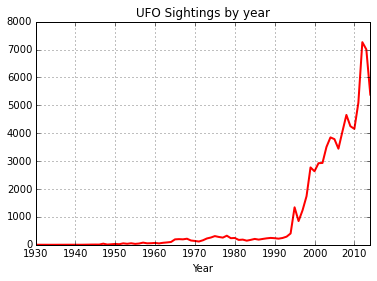

In [144]:
# Plot the number of sightings over time
ufo.groupby('Year').City.count().plot(  kind='line', 
                                        color='r', 
                                        linewidth=2, 
                                        title='UFO Sightings by year')

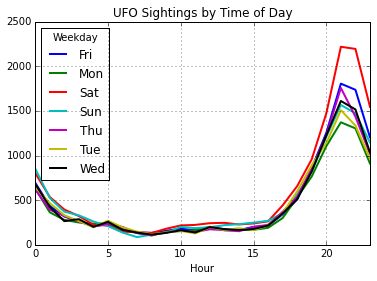

In [147]:
# Plot the number of sightings over the day of week and time of day
ufo.groupby(['Weekday','Hour']).City.count().unstack(0).plot(   kind='line', 
                                                                linewidth=2,
                                                                title='UFO Sightings by Time of Day')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113abbcd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116e7dc90>], dtype=object)

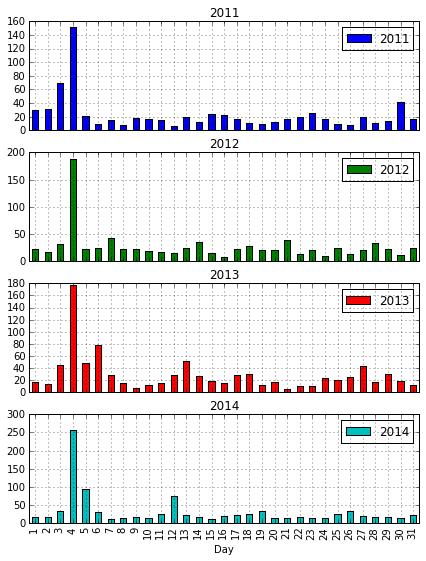

In [148]:
# Plot multiple plots on the same plot (plots neeed to be in column format)              
ufo_fourth = ufo[(ufo.Year.isin([2011, 2012, 2013, 2014])) & (ufo.Month == 7)]
ufo_fourth.groupby(['Year', 'Day']).City.count().unstack(0).plot(   kind = 'bar',
                                                                    subplots=True,
                                                                    figsize=(7,9))

### References
**UFO data**
* Scraped from: http://www.nuforc.org/webreports.html
* Write up about this data: http://josiahjdavis.com/2015/01/01/identifying-with-ufos/   
    
***Drinks data***
* Downloaded from: https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption
* Write up about this data: http://fivethirtyeight.com/datalab/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/